In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data_to_fit.txt")
X = data[:,0]
Y = data[:,1]
sigmaY = data[:,2]

def model_A(x,params):
    y = params[0] + x*params[1] + params[2]*x**2
    return y

def model_B(x,params):
    y = params[0]*(np.exp(-0.5*(x-params[1])**2/params[2]**2))
    return y

def model_C(x,params):
    y = params[0]*(np.exp(-0.5*(x-params[1])**2/params[2]**2))
    y += params[0]*(np.exp(-0.5*(x-params[3])**2/params[4]**2))
    return y

def likelihood(Y,y_model,sigma):
    return -0.5*sum( ((Y-y_model)/sigma)**2)

def mcmc(N,model,X,Y,sigmaY,scale):
    if (model == model_A):
        params_walk = [np.array([-12,0,1])]
        
    if (model == model_B):
        params_walk = []
        params_walk.append(np.random.rand(3))        
        
    if (model == model_C):
        params_walk = []
        params_walk.append(np.random.rand(5))        
    
    for i in range(N):
        params_prime = np.random.normal(loc = params_walk[i], scale=scale)
        
        y_walk = model(X,params_walk[i])
        y_prime = model(X,params_prime)

        like_walk = likelihood(Y,y_walk,sigmaY)
        like_prime = likelihood(Y,y_prime,sigmaY)

        alpha = np.exp(like_prime-like_walk)
        if(alpha>=1.0):
            params_walk.append(params_prime)
        else:
            bb = np.random.rand()
            if(bb<=alpha):
                params_walk.append(params_prime)
            else:
                params_walk.append(params_walk[i])
                
    return np.array(params_walk)

def BIC(L,k,N):
    return -L + 0.5*k*np.log(N)

In [9]:
parA = mcmc(20000,model_A,X,Y,sigmaY,scale=0.1)
parB = mcmc(20000,model_B,X,Y,sigmaY,scale=0.1)
parC = mcmc(20000,model_C,X,Y,sigmaY,scale=0.05)

/home/debian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in exp


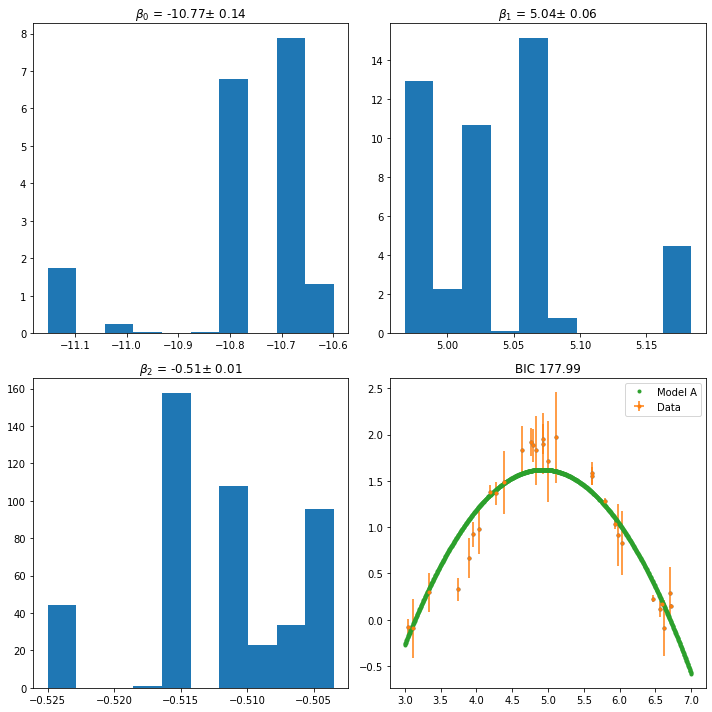

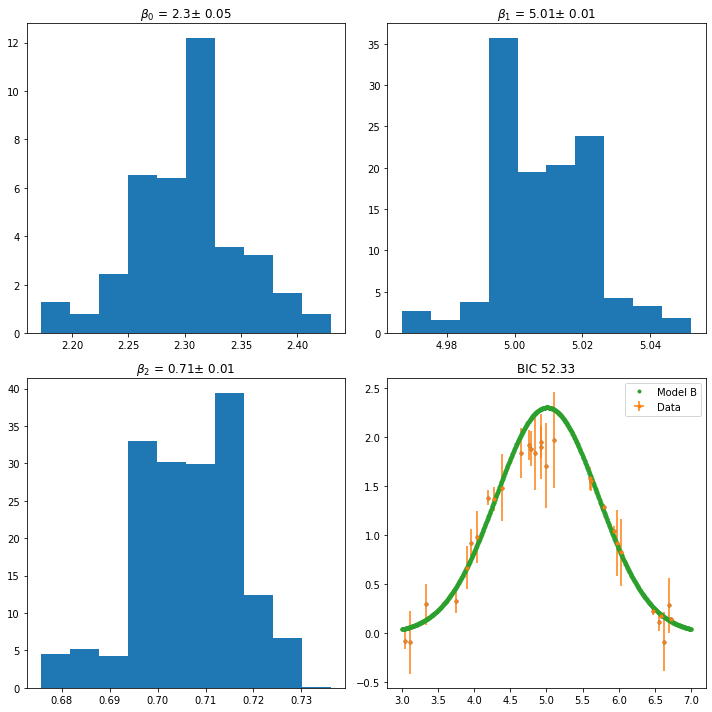

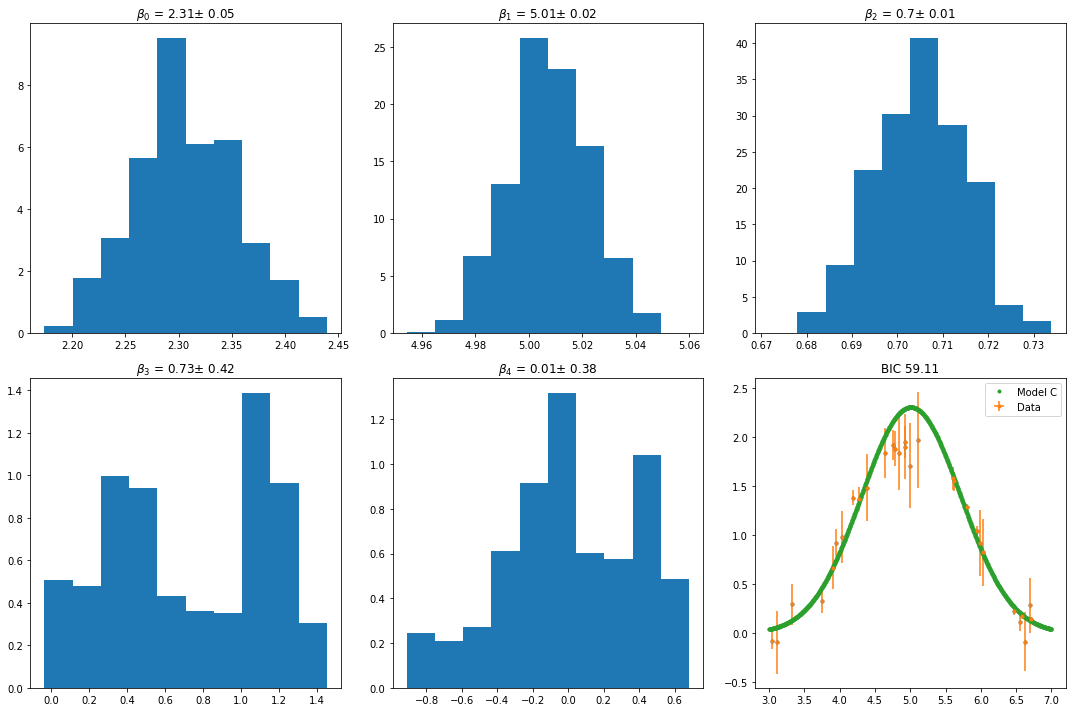

In [11]:
n = 10000
x = np.linspace(3,7,1000)
fig = plt.figure(figsize=(10,10))
ii=1
for i in range(3):
    dataT = parA[:,i][n:]
    std = np.std(dataT)
    mean = np.mean(dataT)
    plt.subplot(2,2,ii)
    plt.title(r'$\beta_'+str(i)+'$ = '+str(round(mean,2))+'$\pm$ '+str(round(std,2)))
    plt.hist(dataT, density= True)
    ii +=1
parmeanA = [np.mean(parA[:,i][n:]) for i in range(3)]    
plt.subplot(2,2,4)
plt.plot(X,Y,".")
plt.errorbar(X, Y, xerr=0, yerr=sigmaY, fmt=".", label="Data")
plt.plot(x,model_A(x,parmeanA),".",label="Model A")
L = likelihood(Y,model_A(X,parmeanA),sigmaY)
bic = BIC(L,5,30)
plt.title("BIC "+str(round(2*bic,2)))
plt.legend()
plt.tight_layout()
plt.savefig("model_A.png")
plt.show()

fig = plt.figure(figsize=(10,10))
ii=1
for i in range(3):
    dataT = parB[:,i][n:]
    std = np.std(dataT)
    mean = np.mean(dataT)
    plt.subplot(2,2,ii)
    plt.title(r'$\beta_'+str(i)+'$ = '+str(round(mean,2))+'$\pm$ '+str(round(std,2)))
    plt.hist(dataT, density= True)
    ii +=1
parmeanB = [np.mean(parB[:,i][n:]) for i in range(3)]    
plt.subplot(2,2,4)
plt.plot(X,Y,".")
plt.errorbar(X, Y, xerr=0, yerr=sigmaY, fmt=".", label="Data")
plt.plot(x,model_B(x,parmeanB),".",label="Model B")
L = likelihood(Y,model_B(X,parmeanB),sigmaY)
bic = BIC(L,3,30)
plt.title("BIC "+str(round(2*bic,2)))
plt.legend()
plt.tight_layout()
plt.savefig("model_B.png")
plt.show()

fig = plt.figure(figsize=(15,10))
ii=1
for i in range(5):
    dataT = parC[:,i][n:]
    std = np.std(dataT)
    mean = np.mean(dataT)
    plt.subplot(2,3,ii)
    plt.title(r'$\beta_'+str(i)+'$ = '+str(round(mean,2))+'$\pm$ '+str(round(std,2)))
    plt.hist(dataT, density= True)
    ii +=1
parmeanC = [np.mean(parC[:,i][n:]) for i in range(5)]    
plt.subplot(2,3,6)
plt.plot(X,Y,".")
plt.errorbar(X, Y, xerr=0, yerr=sigmaY, fmt=".", label="Data")
plt.plot(x,model_C(x,parmeanC),".",label="Model C")
L = likelihood(Y,model_C(X,parmeanC),sigmaY)
bic = BIC(L,5,30)
plt.title("BIC "+str(round(2*bic,2)))
plt.legend()
plt.tight_layout()
plt.savefig("model_C.png")
plt.show()